In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Suicides in India 2001-2012.csv')

In [9]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [32]:
#df.info()
df = df[df['Total'] != 0]
df['Total'].sum()

13071734

### Problem Statement - 1 : Top 5 states with highest number of suicides.

In [33]:
print ( "Number of rows are", df.shape[0])
print ( "Number of columns are", df.shape[1])

Number of rows are 102038
Number of columns are 7


In [18]:
df.groupby("State")['Total'].sum().sort_values(ascending = False)

State
Total (All India)    2911862
Total (States)       2858026
Maharashtra           901945
West Bengal           849936
Tamil Nadu            818691
Andhra Pradesh        814059
Karnataka             734825
Kerala                538946
Madhya Pradesh        451535
Gujarat               330858
Chhattisgarh          302354
Odisha                267234
Rajasthan             255134
Uttar Pradesh         233352
Assam                 172276
Haryana               147176
Delhi (Ut)             84272
Total (Uts)            53836
Jharkhand              49720
Punjab                 46350
Bihar                  46214
Tripura                45965
Puducherry             32144
Himachal Pradesh       26562
Uttarakhand            18496
Goa                    17363
Jammu & Kashmir        14821
Sikkim                  9606
A & N Islands           8109
Arunachal Pradesh       6633
Meghalaya               5415
Chandigarh              5164
Mizoram                 4154
D & N Haveli            3430
Manipur 

#### Total Suicide - 29 lakh 11 k and 862 (almost 3 million). 

In [30]:
df[(df['State']== 'Total (All India)') & ((df['Year']== 2001))]['Total'].sum()

217012

In [31]:
df[(df['State']== 'Total (All India)') & ((df['Year']== 2012))]['Total'].sum()

270890

In [72]:
x = df[df['State']=='Total (All India)'].groupby("Year").sum()

In [73]:
x.sort_values('Total',ascending=False)

,Total
Year,


In [35]:
df = df[df['Age_group'] != '0-100+']

In [43]:
df['Total'].sum()

4336148

In [38]:
print ( " Indian states where the data is collected from ", df['State'].unique())
df.head(2)

 Indian states where the data is collected from  ['A & N Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'D & N Haveli' 'Daman & Diu' 'Delhi (Ut)'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1


In [39]:
yearwise = df[['Year','Total']].groupby("Year").sum()
print(yearwise)

       Total
Year        
2001  325428
2002  331146
2003  332516
2004  340955
2005  341717
2006  354319
2007  367845
2008  374980
2009  381127
2010  403728
2011  405989
2012  376398


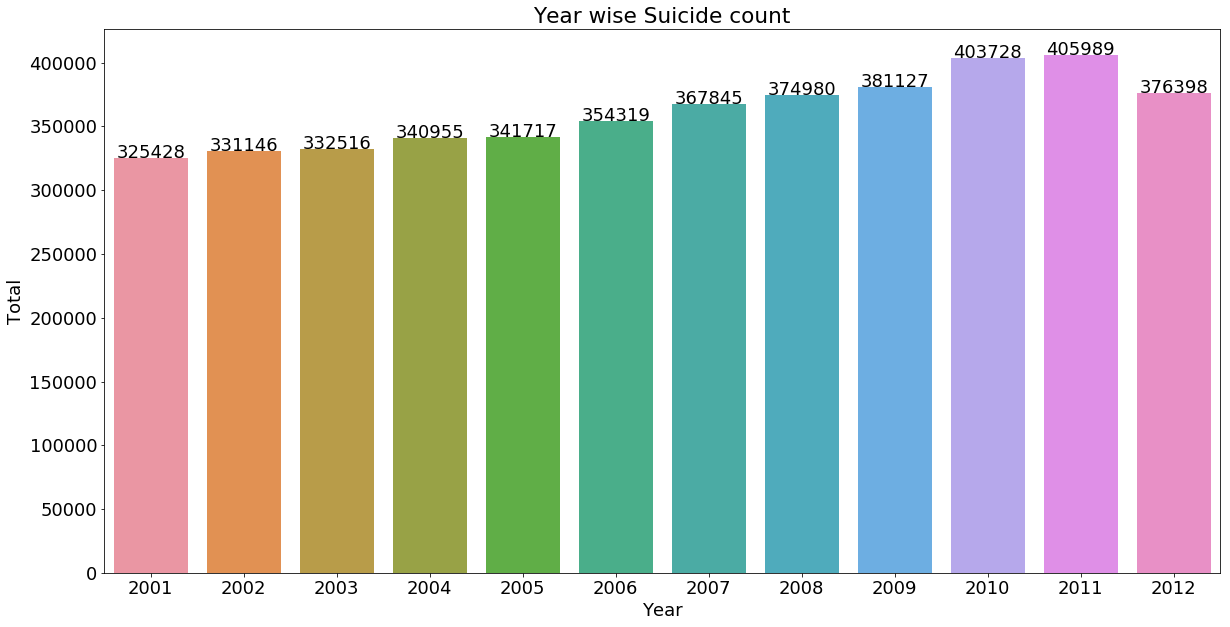

In [42]:
#Making a plot
yearwise.reset_index(inplace = True)
#yearwise
plt.rcParams.update({'font.size': 18})
plt.figure(figsize= (20,10)) # Make a plot size
trace = sns.barplot(x = yearwise['Year'], y = yearwise['Total'], data = yearwise)
# Adding values on the top of the bars
for index, row in yearwise.iterrows():
    trace.text(x = row.name, y = row.Total, s = str(row.Total),color='black', ha="center")
plt.title('Year wise Suicide count')    
plt.show()

In [45]:
df.head(2)

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1


In [58]:
#Type wise suicide count 
typ = df[['Type','Total']].groupby("Type").sum()
#typ1 = typ[typ['Type_code'] == 'Causes']
print(typ1)

KeyError: 'Type_code'

In [74]:
typ = df[df['Type_code'] == 'Causes']
typ1 = typ[['Type','Total']]
typ1.head(2)
typg = typ1.groupby("Type").sum().sort_values('Total',ascending = False)
print(typg)

                                                 Total
Type                                                  
Family Problems                                 341952
Causes Not known                                237069
Other Causes (Please Specity)                   216050
Other Prolonged Illness                         194565
Insanity/Mental Illness                          94229
Love Affairs                                     45039
Bankruptcy or Sudden change in Economic          32755
Poverty                                          32684
Dowry Dispute                                    31970
Drug Abuse/Addiction                             30046
Unemployment                                     27365
Failure in Examination                           27005
Property Dispute                                 18652
Suspected/Illicit Relation                       14911
Fall in Social Reputation                        13464
Professional/Career Problem                      12554
Cancellati

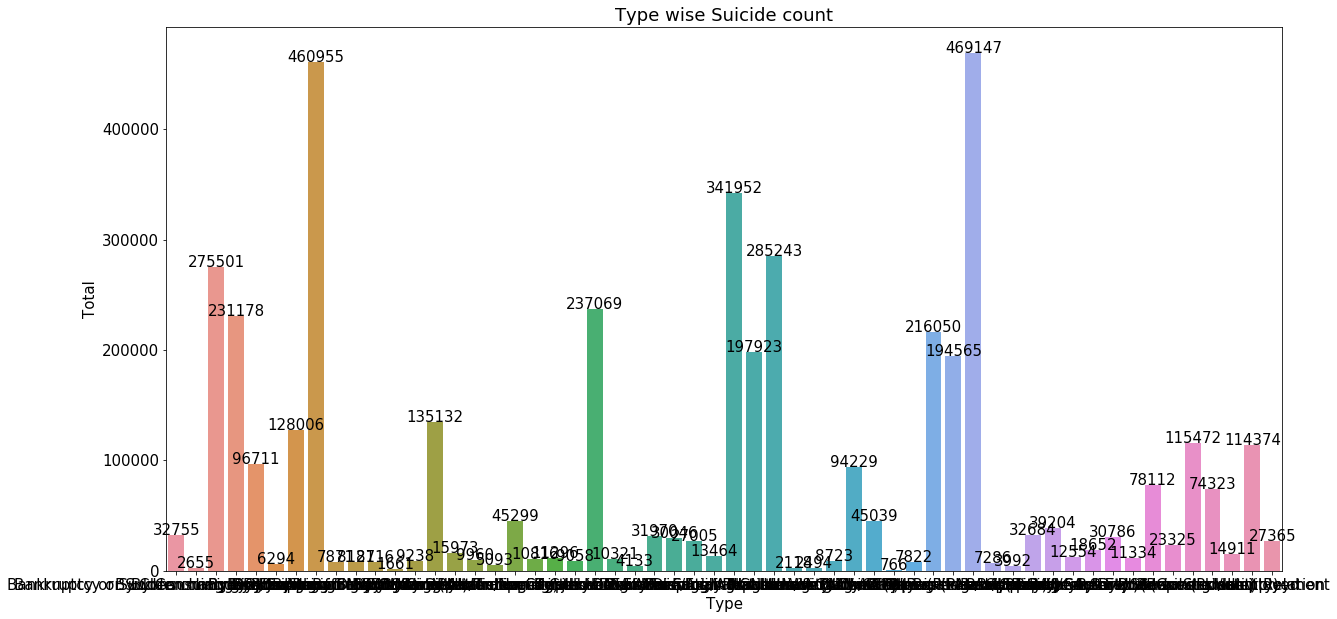

In [53]:
#Making a plot
typ.reset_index(inplace = True)
#yearwise
plt.rcParams.update({'font.size': 15})
plt.figure(figsize= (20,10)) # Make a plot size
trace = sns.barplot(x = typ['Type'], y = typ['Total'], data = typ)
# Adding values on the top of the bars
for index, row in typ.iterrows():
    trace.text(x = row.name, y = row.Total, s = str(row.Total),color='black', ha="center")
plt.title('Type wise Suicide count')    
plt.show()